In [1]:
# pip install import-ipynb

In [60]:
import import_ipynb
from Data_Generation import csvBuilder
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
n = 15000

industries = ['FinTech', 'HealthTech', 'E-Commerce', 'AI', 'EdTech', 'SaaS', 'Gaming', 'Biotech']
industry_probs = [0.15, 0.12, 0.2, 0.18, 0.1, 0.1, 0.08, 0.07]

countries = ['US', 'India', 'UK', 'Germany', 'Canada', 'Israel', 'Singapore']
country_probs = [0.4, 0.2, 0.1, 0.08, 0.08, 0.07, 0.07]

funding_means = {
    'FinTech': 18_000_000,
    'HealthTech': 15_000_000,
    'E-Commerce': 12_000_000,
    'AI': 22_000_000,
    'EdTech': 8_000_000,
    'SaaS': 14_000_000,
    'Gaming': 10_000_000,
    'Biotech': 25_000_000
}

In [6]:
data = csvBuilder(n,industries,industry_probs,countries,country_probs,funding_means)

In [7]:
df = data.generate()

In [8]:
df.head(3)

,company_name,founded_on,industry,headquarters,founder_experience,total_funding_usd,num_funding_rounds,investors_count,last_funding_date,status
0,Murillo Inc,2013-04-03,FinTech,India,4.0,22727307,1,3,2014-08-24,fail
1,Reed-Gutierrez,2012-08-22,E-Commerce,US,5.0,16863728,2,2,2017-05-27,success
2,"Nelson, Ferguson and Martin",2016-01-17,FinTech,Singapore,1.0,20044891,1,3,2024-06-08,fail


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_name        15000 non-null  object        
 1   founded_on          15000 non-null  datetime64[ns]
 2   industry            14250 non-null  object        
 3   headquarters        15000 non-null  object        
 4   founder_experience  14250 non-null  float64       
 5   total_funding_usd   15000 non-null  int64         
 6   num_funding_rounds  15000 non-null  int64         
 7   investors_count     15000 non-null  int64         
 8   last_funding_date   14250 non-null  datetime64[ns]
 9   status              15000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.1+ MB


In [10]:
df.describe()

,founded_on,founder_experience,total_funding_usd,num_funding_rounds,investors_count,last_funding_date
count,15000,14250.000000,1.500000e+04,15000.000000,15000.000000,14250
mean,2016-07-07 20:19:35.039999744,4.556842,1.896965e+07,2.743733,4.380667,2021-04-22 03:36:33.347368704
min,2010-01-01 00:00:00,0.000000,1.000000e+06,1.000000,1.000000,2011-02-27 00:00:00
25%,2013-04-05 18:00:00,1.000000,1.253781e+07,1.000000,3.000000,2018-08-20 00:00:00
50%,2016-07-15 00:00:00,3.000000,1.748513e+07,2.000000,4.000000,2021-12-10 00:00:00
75%,2019-10-15 00:00:00,6.000000,2.403478e+07,4.000000,6.000000,2025-03-31 00:00:00
max,2022-12-31 00:00:00,50.000000,6.034886e+07,8.000000,14.000000,2025-03-31 00:00:00
std,NaN,5.043821,8.661523e+06,1.838555,1.934910,NaN


In [12]:
df.isnull().sum()

company_name            0
founded_on              0
industry              750
headquarters            0
founder_experience    750
total_funding_usd       0
num_funding_rounds      0
investors_count         0
last_funding_date     750
status                  0
dtype: int64

<Axes: xlabel='num_funding_rounds', ylabel='total_funding_usd'>

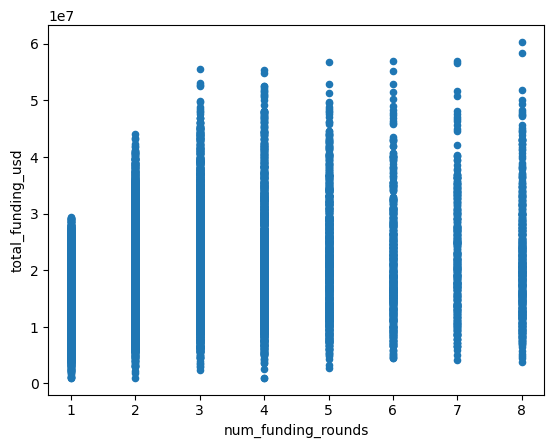

In [18]:
df.plot(x='num_funding_rounds',y='total_funding_usd', kind='scatter')

In [23]:
df['founder_experience'].median()

3.0

In [26]:
df['founder_experience'].fillna(df['founder_experience'].median(), inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_name        15000 non-null  object        
 1   founded_on          15000 non-null  datetime64[ns]
 2   industry            14250 non-null  object        
 3   headquarters        15000 non-null  object        
 4   founder_experience  15000 non-null  float64       
 5   total_funding_usd   15000 non-null  int64         
 6   num_funding_rounds  15000 non-null  int64         
 7   investors_count     15000 non-null  int64         
 8   last_funding_date   14250 non-null  datetime64[ns]
 9   status              15000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.1+ MB


<Axes: >

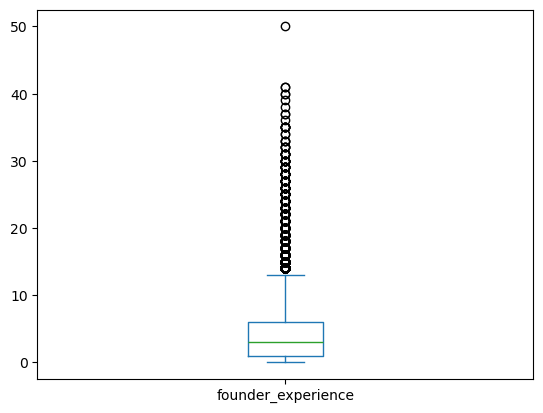

In [35]:
df['founder_experience'].plot(kind='box')

<Axes: >

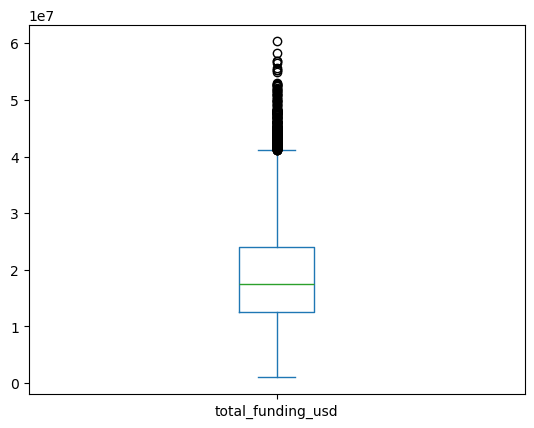

In [59]:
df['total_funding_usd'].plot(kind='box')

In [49]:
df.dropna(subset=['last_funding_date'], inplace=True)

In [50]:
df['last_funding_date']

0       2014-08-24
1       2017-05-27
2       2024-06-08
3       2025-03-31
4       2020-01-10
           ...    
14994   2024-07-26
14995   2023-07-17
14997   2020-11-07
14998   2018-10-09
14999   2018-07-23
Name: last_funding_date, Length: 14250, dtype: datetime64[ns]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14250 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_name        14250 non-null  object        
 1   founded_on          14250 non-null  datetime64[ns]
 2   industry            13539 non-null  object        
 3   headquarters        14250 non-null  object        
 4   founder_experience  14250 non-null  float64       
 5   total_funding_usd   14250 non-null  int64         
 6   num_funding_rounds  14250 non-null  int64         
 7   investors_count     14250 non-null  int64         
 8   last_funding_date   14250 non-null  datetime64[ns]
 9   status              14250 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.2+ MB


In [54]:
df['industry'] = df['industry'].fillna(df['industry'].mode()[0])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14250 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_name        14250 non-null  object        
 1   founded_on          14250 non-null  datetime64[ns]
 2   industry            14250 non-null  object        
 3   headquarters        14250 non-null  object        
 4   founder_experience  14250 non-null  float64       
 5   total_funding_usd   14250 non-null  int64         
 6   num_funding_rounds  14250 non-null  int64         
 7   investors_count     14250 non-null  int64         
 8   last_funding_date   14250 non-null  datetime64[ns]
 9   status              14250 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.2+ MB


In [56]:
X = df.drop('status', axis=1).copy()
X.head()

,company_name,founded_on,industry,headquarters,founder_experience,total_funding_usd,num_funding_rounds,investors_count,last_funding_date
0,Murillo Inc,2013-04-03,FinTech,India,4.0,22727307,1,3,2014-08-24
1,Reed-Gutierrez,2012-08-22,E-Commerce,US,5.0,16863728,2,2,2017-05-27
2,"Nelson, Ferguson and Martin",2016-01-17,FinTech,Singapore,1.0,20044891,1,3,2024-06-08
3,"Morgan, Perry and Jones",2017-08-18,HealthTech,Germany,0.0,22085995,8,5,2025-03-31
4,Cruz Ltd,2018-05-22,AI,US,2.0,26935126,5,6,2020-01-10


In [58]:
y = df['status'].copy()
y.head()

0       fail
1    success
2       fail
3       fail
4    success
Name: status, dtype: object